In [1]:
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt  
import scipy as sp
from sklearn import linear_model

In [2]:
server = 'analyticslab.database.windows.net'
database = 'Accounting'
username = 'student'
password = 'Acct7397'
driver= '{ODBC Driver 17 for SQL Server}'
sql_conn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
query = "SELECT [TV],[Radio],[Sales] FROM [dbo].[Advertising]"
Advertising = pd.read_sql(query, sql_conn)

In [3]:
display(Advertising)

,TV,Radio,Sales
0,230.1,37.8,22.1
1,199.8,2.6,10.6
2,135.2,41.7,17.2
3,222.4,4.3,11.7
4,296.4,36.3,23.8
...,...,...,...
195,107.4,14.0,11.5
196,163.3,31.6,16.9
197,197.6,3.5,11.7
198,184.9,21.0,15.5


In [4]:
X = pd.DataFrame(Advertising, columns=["TV", "Radio"])
y = pd.DataFrame(Advertising, columns=["Sales"])

In [5]:
lm = linear_model.LinearRegression()
mFit = lm.fit(X,y)

In [6]:
mFit.intercept_

array([2.92109991])

In [7]:
mFit.coef_

array([[0.04575482, 0.18799423]])

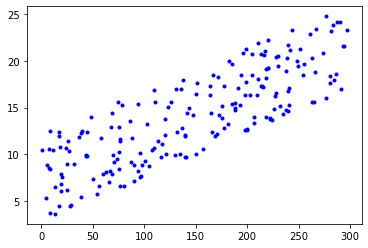

In [8]:
Advertising["yhat"] = mFit.predict(X)
plt.plot(Advertising.TV,Advertising.yhat, "b.")
plt.show()

In [9]:
# Normal Equations Solution - refer to R file and Slides

m = np.shape(X)[0]
vY = np.array(y)
mX = np.c_[np.ones((m, 1)), np.array(X)]
beta = np.linalg.inv(np.transpose(mX).dot(mX)).dot(np.transpose(mX).dot(vY))
display(beta)


array([[2.92109991],
       [0.04575482],
       [0.18799423]])

In [10]:
# Predictions using normal equations
mX
np.transpose(beta)


array([[2.92109991, 0.04575482, 0.18799423]])

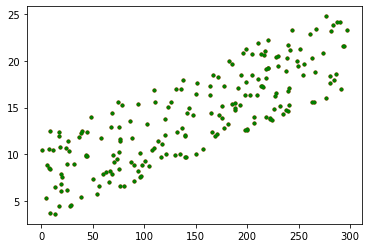

In [11]:
# compare predictions using NE vs lm - should be the same

Advertising["neY"] =  mX.dot(beta)
plt.plot(Advertising.TV,Advertising.yhat, "r.")
plt.plot(Advertising.TV,Advertising.neY, "g.")
plt.show()


In [12]:
Advertising = pd.DataFrame(Advertising, columns=["TV", "Radio", "Sales"])
Advertising.to_csv('Advertising.csv', index = False)

In [ ]:
##################### CHANGE TO PLOTLY? ##################